# Week 7 Quiz

## Chenxi Jiang - cj2706

### Due Tues Oct 25 11:59pm ET

In this quiz we will practice creating a train/test split and compare training and test set accuracy of a trained Decision Tree model against a baseline.

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

In [1]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the sample breast_cancer dataset from Scikit-Learn returning just the 
#   X features and y label (instead of the full Bunch data-structure)
#   This is a common binary classification task dataset used for demonstration.
#   For more information, see:
#     https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
X,y = load_breast_cancer(return_X_y=True)

print(f'num observations:    {X.shape[0]}')
print(f'num features:        {X.shape[1]}')
print(f'target value counts: {dict(Counter(y))}')

num observations:    569
num features:        30
target value counts: {0: 212, 1: 357}


In [3]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Split X and y into X_train,X_test,y_train,y_test 
#    using train_test_split, 
#    stratify using y, 
#    and use the default test_size of 0.25.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Check that the distribution of classes is similar in train and test
assert ((y_train == 0).sum() / len(y_train) - 
        (y_test == 0).sum() / len(y_test)) < .01

In [4]:
# Get a baseline 

# Import DummyClassifier from sklearn
from sklearn.dummy import DummyClassifier

#   Instantiate DummyClassifier 
#      with strategy="prior" (the default)
#      and fit on X_train, y_train
#      store as dummyc
dummyc = DummyClassifier(strategy = "prior")
dummyc.fit(X_train,y_train)

# print out the training set accuracy using dummyc.score()
print(f'dummy training set accuracy: {dummyc.score(X_train,y_train):0.2f}')

# print out the test set accuracy using dummyc.score()
print(f'    dummy test set accuracy: {dummyc.score(X_test,y_test):0.2f}')

dummy training set accuracy: 0.63
    dummy test set accuracy: 0.62


In [5]:
# Train and compare a Decision Tree model

# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 
#    with max_depth=10
#    and train on X_train,y_train
#    store as dtc
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train,y_train)

# print out the training set accuracy using dtc.score()
print(f'dtc training set accuracy: {dtc.score(X_train,y_train):0.2f}')

# print out the test set accuracy using dtc.score()
print(f'    dtc test set accuracy: {dtc.score(X_test,y_test):0.2f}')

dtc training set accuracy: 1.00
    dtc test set accuracy: 0.95


In [6]:
# To expose the different kinds of errors that our Decision Tree model is making,
#   print a confusion matrix 

# import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# generate a confusion_matrix
#    using y_test 
#    and the predictions generated by the trained dtc model on X_test
#    store as cm
cm = confusion_matrix(y_test, dtc.predict(X_test))

print(cm)

[[52  2]
 [ 5 84]]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

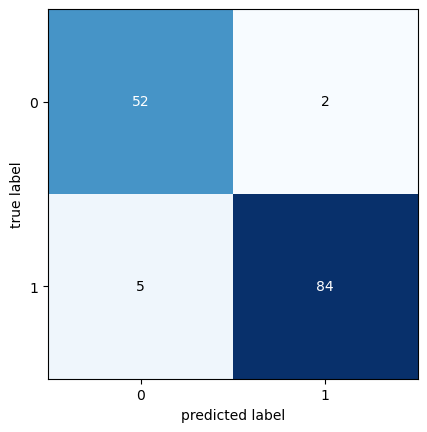

In [7]:
# To help interpret the output of confusion_matrix, 
#    use plot_confusion_matrix from mlxtend

# Import the plot_confusion_matrix function from mlxtend.plotting
from mlxtend.plotting import plot_confusion_matrix

# call plot_confusion_matrix() on the output of 
#   confusion_matrix generated above (cm)
plot_confusion_matrix(cm)